# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Sharon Effiong  
**Date:** 08.15.2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview



The purpose of this project was to gather data to gain insight on a specific product Beats produces and compare the brand to its competitors. In order to compare them, thorough analysis and visualizations were required to percieve the similarites and differences. It also gave Beats insight to understand areas they are dominating and areas they are lacking in order to excel. Every company has the goal to be the top producing brand in its industry and this analysis sheds lgiht for Beats to understand exactly how to do that.

We:
1. Ensure we understood the foundations of python in order to complete the coding required for the project.
2. Broke down the data set into a format that could be used to code. From this we could gather more insight and further perform analysis.
3. We cleaned up the data to ensure that there were no issues such as duplicated data, missing data, etc. In that way, we knew that there was nothing that could alter us from getting the most accurate information for our analysis.
4. We created visualizatons to understand the information we had in front of us. This was an opportunity to visually compare information which could further assist us with our  analysis. On top of that, we performed a sentiment analysis to look at all the comments and understand how people truly felt about each product. It also allowed us to understand if their responses were opinionated or factual.
5. We created our own AI chat box using API Keys. This was beneficial as we could then have gemini extract information for us based on our dataset and answer questions that we might have trouble coding.


### 3.2 Background


Beats is an audio brand that specializes is the creation of headphones, speakers, and earphones. Consumer's interest in Beats products plays a large role in the company's success. Thus making it imperative to understand the desires of both consumers and stakeholders. With the analysis of consumer sentiment, Beats is given the opportunity to dominate in the tech industry for producing audio equipment that cater to both the needs and interests of its consumers.

## 4. Data Description

### 4.1 Data Sources


For the project that consisted of extracting reviews from Amazon, I orignally started with looking at speakers from JBL, Marshalls, Sonos, Beats, and Sony. However, there were some issues along the way – trouble with oxylabs and my free trial expired – and I was unable to use the reviews found to extract data. I ended up working with the data set that was provided. Going through the dataset, I was able to discover that a few of the many earbuds used were: HTC Wireless Buds, 1More Comfo Buds, JBL Tune 230NC, JLAB Go Air pop, Beats Studio Buds, Jabra Elite 4, Soundcore by Anker, Sony WF-C700N, Sennheiser Consumer Audio CX, and Skullcandy Smokin earbuds.

### 4.2 Data Collection


As mentioned in the previous section, I started with my own data collection by attempting to obtain json files through Oxylabs that were derived from the reviews section obtained through Amazon. However, I had some issues with my collection process and proceeded to use Chaitanya's data set. It is understood that he extracted the information using Oxylabs and downloaded the content as JSON files. From there he went to colabs, imported all the informaton, obtain a csv version through coding, and then merged all the data files as one to easily formulate analysis based on the data set.

### 4.3 Data Cleaning


It was important to clean up the data so that we were working with the best version of information. For that to be possible, I first merged all the datasets as one by using merged_df = pd.concat([df,df2,df3,df4,df5]). This allowed all 5 data sheets to be one. This alleiviated the need to run the same code for all 5 sets of data by simplifying the process. Next, I looked for missing values. This could be people that chose to comment about the product but decided not to leave a review. Although useful information, it wasn't useful in regard to my focus which was ratings/reviews. I removed all missing values by running this code: df_dropped1 = merged_df.dropna(inplace = True). I checked to see if the values were dropped using merged_df.isnull().sum() and they were. Everything column came out as zero. I checked for outliers. To do that, I was required to install and import numpy. I had to do a bit of research to find the most useful way to find outliers and I was able to formulate this function: outliers = find_outliers_IQR(merged_df['Stars']). I had to so some previous coding work to ensure this function would work. This gave me the exact number of outliers I had in my dataset. I didn't remove the outliers because I believe it gave me some insight. Looking at the number of outliers I believed that it was important to include reviews from those that may have been extremely dissapointed in the product they purchased and why.  

In [ ]:
## In this case the data is already merged, so I will skip that portion.
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
df = pd.read_csv('AllEars.csv')

df.head(3)


,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,400.0,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...
1,401.0,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...
2,402.0,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...


In [ ]:
# Looking for missing values #
df.isnull().sum()
# Removing them #
df_dropped1 = df.dropna(inplace = True)
# Confirm its dropped#
df.isnull().sum()



,0
Unnamed: 0,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0


In [ ]:
df['rating'] = df['rating'].astype(float)
datatype = df['rating'].dtypes
print(datatype)



float64


In [ ]:
# Check for Outliers #
!pip install numpy
import numpy as np
import scipy.stats as stats

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['rating'])
print('number of outliers:' + str(len(outliers)))

print('max outlier value:' + str(outliers.max()))

print('min outlier value:' + str(outliers.min()))

number of outliers:82
max outlier value:2.0
min outlier value:1.0


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview



I looked for the mean, median, mode, and standard deviation for my dataset. The average overall rating for all earbuds included was 4.309. This is a good level given that this dataset consisted of over 1000+ reviews. Overall people were very happy with the earbuds they may have chose based on the selection. However, it allows us to understand that there is is still substainsial room for improvement. The median found was 5.0. This suggests that over half of the customers gave their specific earbuds a rating of 5. This is postive as this could allow for brand loyalty as consumers will go back to purchase the same earbud type or from the same company if their current pair were to have any issues. The standard deviation was 1.045 and the variance was 1.091. The standard deviation of 1.045 suggests that majority of the points in the data set remained clustered around the mean. This means that the rating were relatively high with a few outliers that may have widend the range.

In [ ]:
mean = df["rating"].mean()
median = df['rating'].median()
mode = df['rating'].mode()
variance = df['rating'].var()
stdev = df['rating'].std()

print(mean)
print(median)
print(mode)
print(variance)
print(stdev)


4.1506228765571915
4.0
0    5.0
Name: rating, dtype: float64
1.1507564143060018
1.072733151490156


### 5.2 Visualizations


In terms of visualizations, I focused on creating a histogram, box plot, and a bar chart. The histogram focuses on the frequency or number of people that gave each rating. It sheds light into understanding what the highest rating was and how the data was spread out between 1-5 stars.The box plot, although not that visually appealing, focuses on the ratings based on each product. This helps each company understand how they are doing compared to others while also seeing the few outliers. The bar chart focuses on how helpful each review rating was compared to the rating given. This means around 500 people found the 2 star review to be extremly helpful for example.

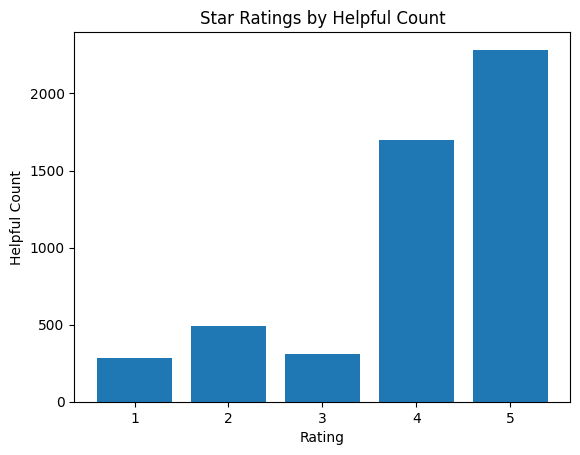

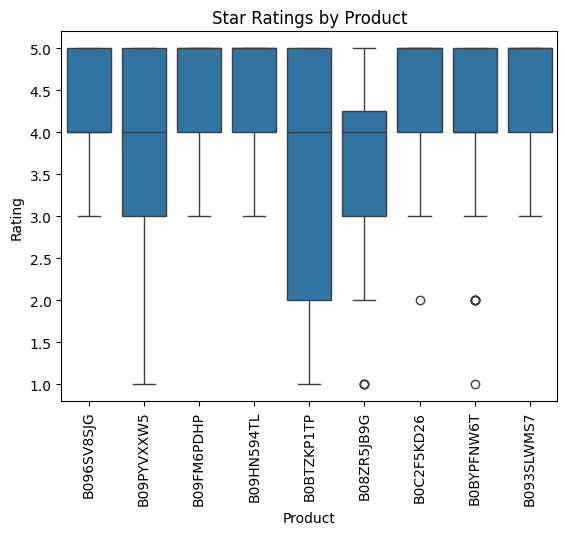

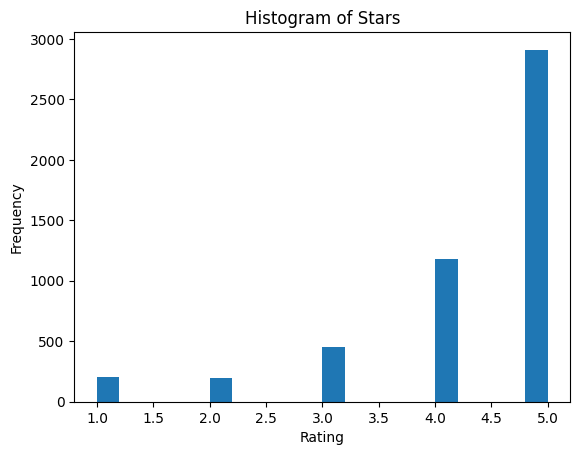

### 5.3 Descriptive Statistics


In terms of key findings, it was clear that the collection of earbuds did fairly good in the eyes of consumers. The histogram reflects how frequently consumers gave each score. It was clear to see how well the products did by how high each bar is in relation to the frequency. The five star rating remained extremly high compared to the other various ratings. In terms of how each indivual product did, the box plot sheds light to understand how they did compared to the other earbuds it was compared by. Finally, the bar chart sheds light into how helpful each rating was. This is important because it allows us to understand how much a specific rating could impact one's willilingness to purchase the product.

## 6. Sentiment Analysis

### 6.1 Methodology


The sentiment analysis focuses on consumer reviews and analyzes the feedback received understand their overall view on each product. For example, if I used a product and realized that I liked it a lot. I may leave a comment saying " The best product ever". From this, one can analyze the text using eithr textblob or NLTk to gain more insight regarding my feeling towards the product. NLTK will allow an analyst to understand how much I liked the product as the output produced usually follows a format similar to this: {pos: , neg: , neu: }. From that, an analyst is able to understand just how much of the text was positive, negative, or neutral. In this case, I used NLTK to understand the reviews by running this code: import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer().
I ran text = df['content'][0] to lock in the focused information. To obtain an output, I ran the codes Sentiment = sia.polarity_scores(text)
print(Sentiment).
Textblob focuses on producing information based on the texts. It gives an overall picure of the sentiment, based on one number, and if the comments are more personal or opinion based with another number.


### 6.2 Results


When running the codes mentioned in 6.1, the output returned was {'neg': 0.105, 'neu': 0.793, 'pos': 0.102, 'compound': -0.3902}.

This allowed me to understand that 10.5% of the reviews were negative, 79.3% were neutral and 10.2% of them were positive. This mean that overall, the earbuds were considered decent to users, however, it should be in each brands interest to alter that information from neutral to positive. It is a good indicator that a lot of work needs to still be done to encourage success for the various earphone brands.

The text blob analysis produced an output of
polarity= 0.2064486703772419, subjectivity = 0.45769171304885564. This means that the comments were overall positive, however, they can still be improved as the range is between -1 to 1. The subjectiviy recieved a score of 0.458. This meant that the comments were largely opinion based. That would make sense as they were trying the products and chose to leave a review based on how it performed. With this findings, Beats by Dre can use the information presented to their advantage in order to dominate the market. With this information, Beats can channel their improvements to ensure opinion based reviews are more positive than what they currently are.

## 7. AI-Generated Insights

### 7.1 Using Gemini AI


We used Gemini AI to go through the dataset that has been cleaned up and extract insights used prompts. These prompts were required to have 2-6 cruicial componenets in order to be successful in receiving a beneficial output. The prompts were required to have a task, context, exemplar, persona, format, and tone. The reason I said between 2-6 is because having a task and context is crucial to receiving a less generic response, but, if the goal is to obtain the most concise response then having the other remaining components are essential for its success in deriving a useful output.
To tell Gemini AI to extract insights, it was necessary to create codes as such:
prompt_message = "Analyze the following reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

The API key was formulated by gemini API on google.  

### 7.2 Key Insights



I asked Gemini AI three questions.
1. "Based on the comments, of all the earbuds, which one seems to have more positive comments and be more favorable overall by users? I am interested in getting realiable earphones with good sound quality."
2. "Based on the overall reviews, which earbuds are most water resistant? I am a life guard. Although I won't swim with them, they may get wet."
3. If I were interested in starting my own earbud company, what are some important take aways to consider? I want to be successful and cater to the needs of my customers.

For the first question, Gemini AI responded "Based on the comments, the **1More ComfoBuds Mini** earbuds seem to have a mixed reception." The chat box explained how it had the most positive reviews comapred to its counterparts, based of 1000+ sets of reviews. The reason for its success was how small it was, its comfort, its good sound quality, and how good its noise cancellation is. However, the chat box was sure to list the negative responses from consumers such as quality control issues. Even with both the positive and negative replies, the 1More Comfobuds mini still did the best overall.

For the second question, AI looked at the most water-resistant based on the comments but quickly found that even though it scored the highest, the comments were still fairly negative in regard to the its ability to perform well if exposed to water. AI suggested I use other earphones and gave me suggestions of what may be better. The suggestions consisted of Sony WF-1000XM4, Samsung Galaxy Buds 2 Pro, and Jabra Elite 7 Pro.

For the final question, the chat box broke down the key takeaways based on the reviews I gave it. From there it created the categories: customer needs & trends, common pain points, opportunites for success, and additional tips.  Every detail given was extracted directly from negative comments in hopes that I would focus on improving them in my earphones.

### 7.3 Interpretation


These insights are very important to Beats by Dre as they clearly explained issues that consumers faced with all the products within the dataset. Beats was not given the highest positive comments. This is something that the company can look into and understand why that was the case. From there, they can work on improving the sections that dissapointed consumers. On top of that, I asked a question regarding what my earphones need to be like in order to be successful if starting a new business in the tech industry. That question gives Beats ample insight as it shows where the industry is currently failing based on comments by 1000+ users. That section gives Beats the blueprint to essentially dominate the industry by tackling each issue one by one or all in one product. This in the long run allows for brand loyalty and in turn allows Beats to increase earnings and continue to remain successful.  

## 8. Comparative Analysis

### 8.1 Competitor Overview


The competitors analyzed for earbuds were HTC, 1More, JBL , JLAB, Beats, Jabra, Soundcore by Anker, Sony, Sennheiser, and Skullcandy. HTC is a newer company in the technology that created both mobile phones and other technology products such as earphones. 1More is a fairly budget-friendly company that provides different type of audio devices. They create earphones and headphones. JBL produces earphones, headphones, and speakers. Their products are typically affordable in order to grab the attention of more consumers. JLAB produced head and earphones that are catered towards everyone. Their prices are fairly affordable and the products come in various different colors. Jabra specializes in the creation of earphones, headphones, and speakers. On top of that, they also have special products such as hearing aids.  



### 8.2 Comparison of Sentiments




Beats by Dre had an NLTK score of  {'neg': 0.077, 'neu': 0.74, 'pos': 0.184, 'compound': 0.9985}. This means that from all the comments, 7.7% were negative or had  negativity in it, 74% remained neutral, and 18.4% had something positive to say. Its competitors had sentiments with a negative percentage of 10.5, a neutral percentage of 79.3, and a positive percentage of 10.2. Beats exceeded in the comments that had positivity in them, however, they could improve by having a higher difference in positive and neutral comments compared to its competitors. Beats also did better regarding the percent of negativity in comments.

In terms of textblob analysis, the analysis calculated a polarity of 0.16530880230880232 and subjectivity of 0.5307694003527337 for Beats. This means the comments were overall positive for Beats comparing this number to a -1 to 1 scale. This remains lower than the competitors score of 20.6%. Some work will need to be done by Beats. Beats recieved a higher score in terms of comments/ reviews being factual or opinionated. Beats recieved a 53% and competitors recieved a 46%.



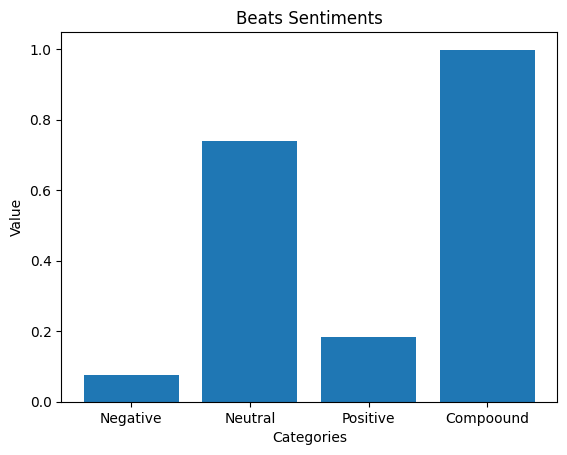

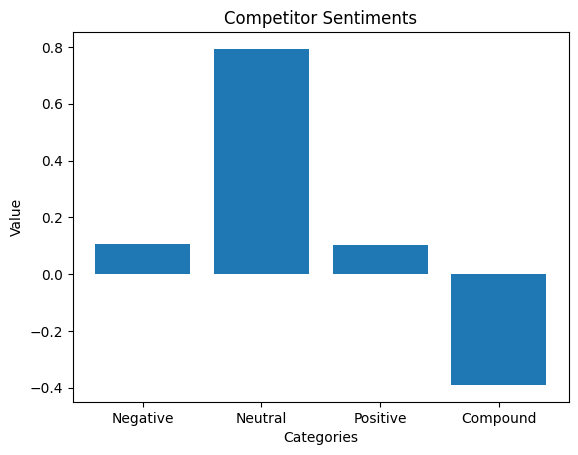

In [ ]:
Value  = [0.077,  0.74,  0.184, 0.9985]
Category = [ 'Negative', 'Neutral', 'Positive', 'Compoound']


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create Two Bar Charts
plt.bar(Category, Value)
plt.title('Beats Sentiments')
plt.xlabel('Categories')
plt.ylabel('Value')
plt.show()


Value1 = [0.105, 0.793, 0.102, -0.3902]
Category1 = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.bar(Category1, Value1)
plt.title('Competitor Sentiments')
plt.xlabel('Categories')
plt.ylabel('Value')
plt.show()

### 8.3 SWOT Analysis



**Strength:** Beats produces audio devices such as speakers, earphones, and headphones. Beats earphone and headphones are both water resistant and have noise cancelling abilities. This allows the brand to remain strong as its other competitors also have these features incorporated with their audio devices. On top of that Beats tends to make devices in various different colors. This is a huge strength for the brand as they were first to the game with it. If consumer's see other audio brand do the same, they would automatically infer that they chose to "copy" Beats rather than generate an original idea. Beats currently has a partnership with Kim Kardashian. This brand deal has proven to be extremly succesful in terms of the original color scheme produces and the fact that Beats connected with such a large and widely known celebrity. Finally, a large strength for Beats is the fact that they were acquired by Apple. This allows them to have access to  such a large companies resources.  
**Weakness:** Beats is not widely recognized when it comes to the speakers they produce. For that, its imperative that they improve their branding on that part as its a device they are producing that isn't gaining enough traction. In addition to that, Beats needs to consider creating devices with greater technological advancements. As of this time, there's not much that Beats produces that allows them to stand out compared to its competitors. The brand does a really good job at producing devices with unqiue colors, but even this isn't enough. One thing people aspire to see is technology that has not been seen before. Majority of people choose to run toward this new technology in order to say they've tried it and were one of the first few people to do so. In the past few years, I haven't heard that type of converstation surround Beats by Dre's products.
**Opportunities:** Beats has ample opportunity to succeed by adapting newer technologies to the devices they already own. As mentioned previously, Beats was acquired by Apple, that is an oustanding opportunity in itself in additon to  having the ability to leverage the technology already existing at Apple. This gives the brand a competitive front that no other audio brand has at the momement. Although, its important to understand how to use and leverage this opportunity. Incorperating technlogy such as health tracking gives them an opportunity to succeed compared to others in the market. Customers already have strong love for the devices Beats produced due to its unique color schemes.
**Threats:** Threats for Beats is directly related to areas where the brand is not performing as efficiently. The brand has multiple issues with the earbuds and headphones they currently produce. In order to improve their stance, these features need to be improved as they are negatively impacting the company's success. Many people within the reviews shed light regarding how they prefer Beats, however, they chose to go to other audio brands because they could not justify staying with the brand given how weak that component is. This is something so disruptive for the brand that its making them lose current and prospective customers. In order to allow this weakness not to impact them, change is necessary to be made.

## 9. Strategic Recommendations

### 9.1 Product Improvements



Based on reviewing the comments set forth by my AI chat box and indivually reviewing each comment, it was understood that Beats needs to significantly imporve the microphone its Beats Studio Buds. Multiple people had relatively positive things to say, however, a common con noted was the lack of being heard while using the earphones microphones. People said they had an extremly hard time being heard and that this would often be a nusiance for them. A few people have complained about connection issues, so that it something that could also be fixed to avoid such a low positive score in terms of comments sentiment.

### 9.2 Marketing Strategies



Although a very common response, in this age digital marketing has become a very useful method to improve one's marketing reach. Using digital platforms, such as TikTok, gives Beats not only the opportunity to enagage current customers that support the brand, but also lure in new and prospective customers through the use of the for you page, also know as FYP. When creating video's on TikTok, it would be ideal to either show the new and improved microphones or show consumers how to effectivley use microphones on their current earphones. This shows Beats consumers that the company hears and actively listens to their problems, and also that they are willing to do what is necessary to retain customers. Beats did a very good job by partnering with Kim Kardashian to produce the custom colors of Headphones. The company should consider other partnerships similar to that that could bring in both new customers and retain current customers. Celebrities that have high publicity surrounding their names at the moment such as Taylor Swift, Charli D'Amelio, etc. Another idea would be allowing people to customize their own headphones. Make it personalized, add stickers, have multiple colors. A piece that they know is unique to them only.


### 9.3 Future Research



Some areas to research would be understanding what its competitors have that beats is missing. For example, although Apple and Beats are under the same umbrella, more users may be inclined to use Beats given how colorful its products are. Based on the comments, a handful of consumers mentioned their love for choosing different colors. With this advantage, adding features such as health tracking can truly help Beats dominate the audio industry. If people are able to use their earphones/headphones to track step counts and other vital health information, consumers would have no reason choosing another company when needing earphones. Another area for further research would be discovering a method that will allow earbuds to not fall out of its user's ears. At this moment, almost every earphone brand suffers from this. Possibly creating multiple earbud tips could help with this issue. However, an abundance of research will be necessary to find a solution toward this issue.

## 10. Conclusion


Beats by Dre is doing relatively well compared to its counterparts. However, as always, there is still ample room for improvement. For starters, based on the sentiment analysis, Beats by Dre's competitors did substainstially better than them in terms of overall positive reveiws. The company had issues with the opinion based reviews recieved. This in turn hurt them when reviewing the overall sentiment.  On top of that, the brand faced issues in terms of direct comments, by using my own AI chat box, I was able to ask and understand that a large majority of Beats customers have strong concerns regarding the microphone within their earbuds. They complained how it does not work efficiently. There was a repeat of this comment type and most likely directly related to the negative sentiment portion of our analysis.   

## 11. References
List all the sources, tools, and references used in the project.


*   https://gemini.google.com/app/
*   https://www.nltk.org/
*   https://www.nltk.org/howto
*   www.amazon.com
*   www.oxylabs.com
*   colabs.reasearch.google.com
*   www.platform.extern.com
*   HTC, 1More Comfo Buds,
*   JBL Tune 230NC,
*   JLAB Go Air pop,
*   Beats Studio Buds,
*   Jabra Elite 4,
*   Soundcore by Anker,
*   Sony WF-C700N,
*   Sennheiser Consumer Audio CX,
*   Skullcandy smokin earbuds
*   Chaitanya Baweja